In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. Load the dataset 
df = pd.read_csv('credit_risk_dataset.csv')

# 2. Drop missing values just for this quick scout run
# (AutoGluon handles them naturally, but this ensures a clean, fast 5-min run)
df = df.dropna()

# 3. Deploy the Scout (AutoGluon)
print("🚀 Launching AutoGluon Scout...")

# We tell it what to predict, use the lightweight deployment preset to save your SSD, 
# and restrict it to a strict 5-minute time limit.
predictor = TabularPredictor(label='loan_status').fit(
    df, 
    presets='optimize_for_deployment', 
    time_limit=300 
)

# 4. Reveal the Leaderboard
print("\n🏆 AutoGluon Leaderboard:")
print(predictor.leaderboard(silent=True))

# 5. Extract the Winning Formula
best_model = predictor.model_best
print(f"\n🥇 The Absolute Best Model is: {best_model}")

# 6. Steal the Hyperparameters (The Secret Sauce)
hyperparameters = predictor.info()['model_info'][best_model]['hyperparameters']
print("\n📝 Optimal Hyperparameters to hardcode:")
for key, value in hyperparameters.items():
    print(f"{key}: {value}")

No path specified. Models will be saved in: "AutogluonModels\ag-20260223_220008"
Verbosity: 2 (Standard Logging)


🚀 Launching AutoGluon Scout...


=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.10.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          16
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       19.46 GB / 31.28 GB (62.2%)
Disk Space Avail:   39.25 GB / 97.66 GB (40.2%)
Presets specified: ['optimize_for_deployment']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "D:\Loan_Default_Project\AutogluonModels\ag-20260223_220008"
Train Data Rows:    28638
Train Data Columns: 11
Label Column:       loan_status
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [np.int64(1), np.int64(0)]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify p


🏆 AutoGluon Leaderboard:
                 model  score_val eval_metric  pred_time_val  fit_time  \
0              XGBoost   0.941623    accuracy       0.023181  0.375300   
1  WeightedEnsemble_L2   0.941623    accuracy       0.023181  0.494498   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.023181           0.375300            1       True   
1                0.000000           0.119198            2       True   

   fit_order  
0          1  
1          2  

🥇 The Absolute Best Model is: WeightedEnsemble_L2

📝 Optimal Hyperparameters to hardcode:
use_orig_features: False
valid_stacker: True
max_base_models: 0
max_base_models_per_type: auto
save_bag_folds: True
stratify: auto
bin: auto
n_bins: None
vary_seed_across_folds: False
model_random_seed: 0


In [2]:
# Steal the exact XGBoost math configuration
xgb_params = predictor.info()['model_info']['XGBoost']['hyperparameters']
print("\n📝 True XGBoost Hyperparameters:")
for key, value in xgb_params.items():
    print(f"{key}: {value}")


📝 True XGBoost Hyperparameters:
n_estimators: 10000
learning_rate: 0.1
n_jobs: -1
proc.max_category_levels: 100
objective: binary:logistic
booster: gbtree
seed: 0


In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Load and clean the data
df = pd.read_csv('credit_risk_dataset.csv').dropna()

In [4]:
# 2. Separate Inputs (X) and Output (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [5]:
# 3. Handle Text Data (Categorical Encoding)
# XGBoost can natively understand categories if we change their data type
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

In [6]:
# 4. Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# 5. Build the Model (Using the Stolen Hyperparameters!)
print("⚙️ Training the custom XGBoost model...")
model = XGBClassifier(
    n_estimators=1000,           # We cap it at 1000 for safety
    learning_rate=0.1,
    n_jobs=-1,                   # Uses all cores of your Ryzen 7
    objective='binary:logistic',
    booster='gbtree',
    random_state=0,
    enable_categorical=True,     # Tells XGBoost to handle the text columns
    early_stopping_rounds=50     # Stops training if it doesn't improve for 50 rounds
)

# 6. Train the model and evaluate it simultaneously
model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    verbose=False
)

# 7. Final Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\n✅ Training Complete!")
print(f"🎯 Final Custom Model Accuracy: {accuracy * 100:.2f}%")

⚙️ Training the custom XGBoost model...

✅ Training Complete!
🎯 Final Custom Model Accuracy: 93.80%


In [9]:
# 8. Save for Deployment
joblib.dump(model, 'lightweight_bank_model.pkl')
print(f"💾 Model successfully saved as 'lightweight_bank_model.pkl'")

💾 Model successfully saved as 'lightweight_bank_model.pkl'


In [11]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
import joblib

# 1. Load the dataset and the trained model
df = pd.read_csv('credit_risk_dataset.csv').dropna()
model = joblib.load('lightweight_bank_model.pkl')

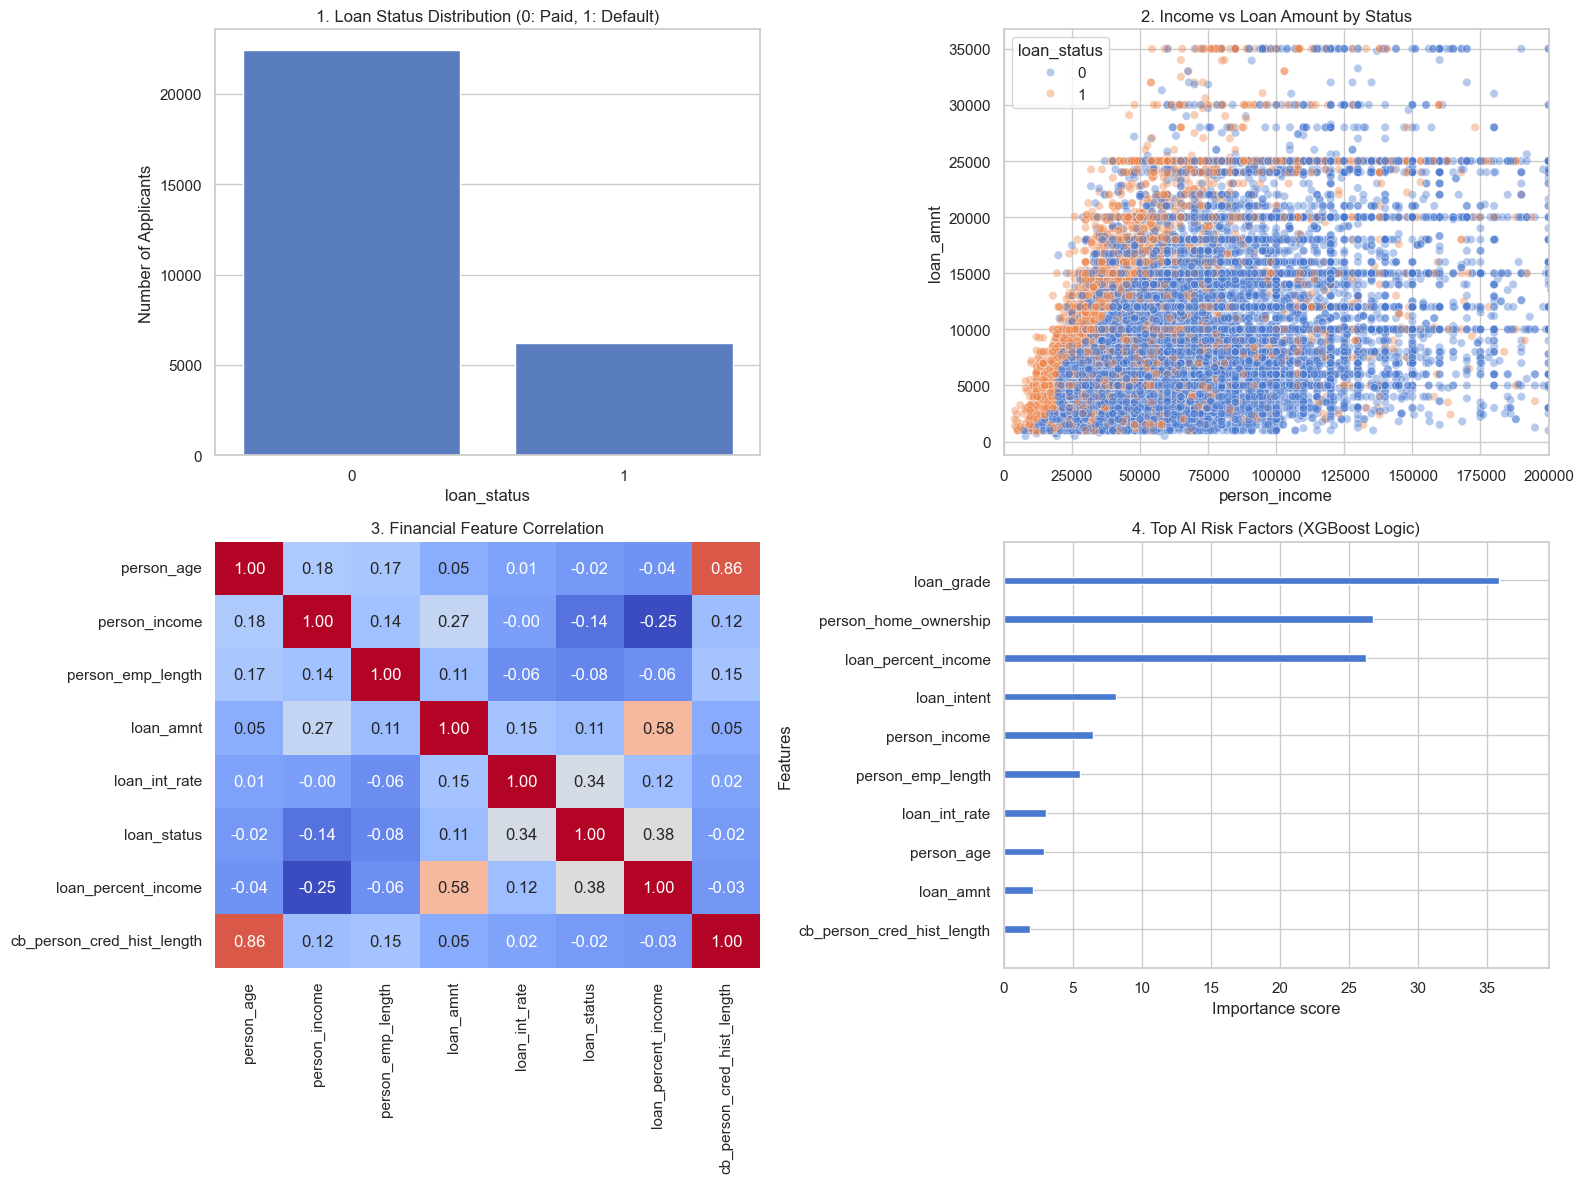

In [19]:
# Set the visual style for professional charts
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 12))

# Chart 1: Class Balance (Paid vs Defaulted)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='loan_status')
plt.title('1. Loan Status Distribution (0: Paid, 1: Default)')
plt.ylabel('Number of Applicants')

# Chart 2: Income vs. Loan Amount (Risk Clusters)
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.4)
plt.title('2. Income vs Loan Amount by Status')
plt.xlim(0, 200000) # Capped at 200k to ignore extreme outliers and see the bulk of the data

# Chart 3: Financial Feature Correlation Heatmap
plt.subplot(2, 2, 3)
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('3. Financial Feature Correlation')

# Chart 4: XGBoost Feature Importance
ax = plt.subplot(2, 2, 4)
plot_importance(model, ax=ax, importance_type='gain', max_num_features=10, show_values=False)
plt.title('4. Top AI Risk Factors (XGBoost Logic)')

# Render the beautiful dashboard
plt.tight_layout()
plt.show()